# K-Nearest Neighbors Algorithm example - 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
sns.set()

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



In [10]:
breast_cancer = load_breast_cancer()
x = pd.DataFrame(breast_cancer.data, columns =breast_cancer.feature_names)
x = x[['mean area','mean compactness']]


y = pd.Categorical.from_codes(breast_cancer.target,breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

[malignant, malignant, malignant, malignant, malignant, ..., malignant, malignant, malignant, malignant, benign]
Length: 569
Categories (2, object): [malignant, benign]

In [3]:
#  By default, train_test_split sets aside 25% of the samples in the original dataset for testing.
x_train, x_test, y_train, y_test =train_test_split(x,y, random_state =1)

In [4]:
# By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier
# to use Euclidean distance for determining the proximity between neighboring points.

knn = KNeighborsClassifier(n_neighbors=5, metric= 'euclidean')
knn.fit(x_train,y_train)

C:\Users\Diwakar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [5]:
# Using our newly trained model, we predict whether a tumor is benign or not given its mean compactness and area.

y_pred = knn.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1], dtype=uint8)

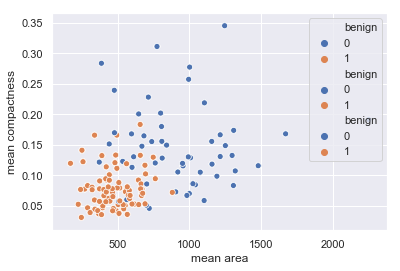

In [11]:
# We visually compare the predictions made by our model with the samples inside the testing set.

sns.scatterplot(x= 'mean area', y= 'mean compactness', hue='benign', data = x_test.join(y_test, how='outer'))
plt.show()

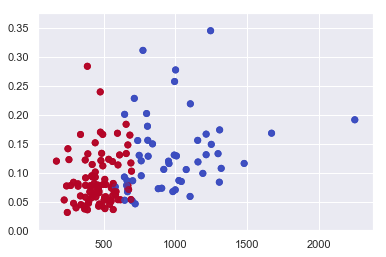

In [17]:
plt.scatter(x_test['mean area'],x_test['mean compactness'], c=y_pred, cmap='coolwarm', alpha=0.7)
plt.show()

In [18]:
# Another way of evaluating our model is to compute the confusion matrix. The numbers on the diagonal of the
# confusion matrix correspond to correct predictions whereas the others imply false positives and false negatives.

confusion_matrix(y_test, y_pred)

array([[42, 13],
       [ 9, 79]], dtype=int64)

In [23]:
result = (42+79)/((42+9+13+79))
print("accruacy from confusion matrix = (sum of dia)/ (sum of total element) =  ", result)

accruacy from confusion matrix = (sum of dia)/ (sum of total element) =   0.8461538461538461


In [24]:
# Accuracy: Overall, how often is the classifier correct?
# (TP+TN)/total = (42+79)/((42+9)+(13+79))= 0.8461538461538461

In [25]:
53/60

0.8833333333333333

In [ ]:
# '''
# The following code is for the K-Nearest Neighbors
# Created by - ANALYTICS VIDHYA
# '''
# # importing required libraries
# import pandas as pd
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# # read the train and test dataset
# train_data = pd.read_csv('train-data.csv')
# test_data = pd.read_csv('test-data.csv')

# # shape of the dataset
# print('Shape of training data :',train_data.shape)
# print('Shape of testing data :',test_data.shape)

# # Now, we need to predict the missing target variable in the test data
# # target variable - Survived

# # seperate the independent and target variable on training data
# train_x = train_data.drop(columns=['Survived'],axis=1)
# train_y = train_data['Survived']

# # seperate the independent and target variable on testing data
# test_x = test_data.drop(columns=['Survived'],axis=1)
# test_y = test_data['Survived']

# '''
# Create the object of the K-Nearest Neighbor model
# You can also add other parameters and test your code here
# Some parameters are : n_neighbors, leaf_size
# Documentation of sklearn K-Neighbors Classifier: 

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

#  '''
# model = KNeighborsClassifier()  

# # fit the model with the training data
# model.fit(train_x,train_y)

# # Number of Neighbors used to predict the target
# print('\nThe number of neighbors used to predict the target : ',model.n_neighbors)

# # predict the target on the train dataset
# predict_train = model.predict(train_x)
# print('\nTarget on train data',predict_train) 

# # Accuray Score on train dataset
# accuracy_train = accuracy_score(train_y,predict_train)
# print('accuracy_score on train dataset : ', accuracy_train)

# # predict the target on the test dataset
# predict_test = model.predict(test_x)
# print('Target on test data',predict_test) 

# # Accuracy Score on test dataset
# accuracy_test = accuracy_score(test_y,predict_test)
# print('accuracy_score on test dataset : ', accuracy_test)